In [1]:
import numpy as np 
import SC_search
import matplotlib.pyplot as plt
import scienceplots 
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
plt.style.use('science')

Cupy not installed


No CuPy or GPU response available.
No CuPy or GPU interpolation available.
No CuPy
No CuPy or GPU PhenomHM module.
Cupy not installed, search (on full FFT grid) wont work
Cupy not installed, Inference wont work
Cupy not installed


The aim is to verify that the "peak" in the search statistic over the phasing parameters are indeed getting wider as $N$ is increased. We will do this in a hand wavy way here by taking slices over $\Upsilon_N$ alone lines in some phasing parameters

In [7]:
# Frequency domain setup
year_in_seconds = 365.25*24*60*60

# Frequency bounds
f_low = 0.018
f_high = 0.03



T_obs = (3*year_in_seconds)
d = 1/(T_obs)
safety = 10
cadence = 2/(f_high*safety)

freqs = np.arange(0.015,f_high+d,d)


In [4]:
source_parameters = [28.09555579546043,#mc [sm]
                    0.24710059171597634,#eta
                    50.1*(1.e+6),#D
                    np.pi/4,#beta [rads]
                    2.01,#lambda [rads]
                    2.498091544796509,#inc [rads]
                    -1.851592653589793,#polarization [rads]
                    0,#phi0 [rads]
                    0.018/2,
                    0.01]#e0

In [5]:
source_params_transformed = SC_search.Utility.TaylorF2Ecc_mc_eta_to_m1m2(source_parameters.copy())


In [8]:
# Use interpolation functionality from BBHx
freqs_sparse = freqs[::1000]
injection= SC_search.Waveforms.TaylorF2Ecc.BBHx_response_interpolate_CPU(source_params_transformed,
                                                                                  freqs_sparse,
                                                                                  freqs,
                                                                                  f_high,
                                                                                  T_obs,
                                                                                  'AET',
                                                                                  logging=True)





Time to merger is:  3.5550937742535975  years
Upper bound on time in band:  2.6438861012726447  years (no eccentricity evolution assumed)


In [13]:
Sdisp = SC_search.Noise.Sdisp_SciRD(freqs)
Sopt = SC_search.Noise.Sopt_SciRD(freqs)
psd_A = SC_search.Noise.psd_AEX(freqs,Sdisp,Sopt)
psd_E = SC_search.Noise.psd_AEX(freqs,Sdisp,Sopt)
psd_T = SC_search.Noise.psd_TX(freqs,Sdisp,Sopt)

psd_array = np.array([psd_A,psd_E,psd_T])


In [10]:
Ns = [50,10,1]

Take slices in $\Upsilon_{N}$ in $\mathcal{M}_c,f_{\rm low}, e_0$, ie phasing parmaeters

In [32]:
# Mc 
master_list = []
Mc_range = np.linspace(28.09555579546043-0.0005,28.09555579546043+0.0005,100)
for N in Ns: 
    Upsilons = []
    for Mc in Mc_range:
        source_params_offset = source_parameters.copy()
        source_params_offset[0] = Mc
        source_params_offset_transformed = SC_search.Utility.TaylorF2Ecc_mc_eta_to_m1m2(source_params_offset.copy())

        model= SC_search.Waveforms.TaylorF2Ecc.BBHx_response_interpolate_CPU(source_params_offset_transformed,
                                                                                  freqs_sparse,
                                                                                  freqs,
                                                                                  f_high,
                                                                                  T_obs,
                                                                                  'AET',
                                                                                  logging=False)
        
        Upsilons.append(SC_search.Semi_Coherent_Functions.upsilon_func(model,injection,psd_array,d,num_segments=N))
    master_list.append(Upsilons)

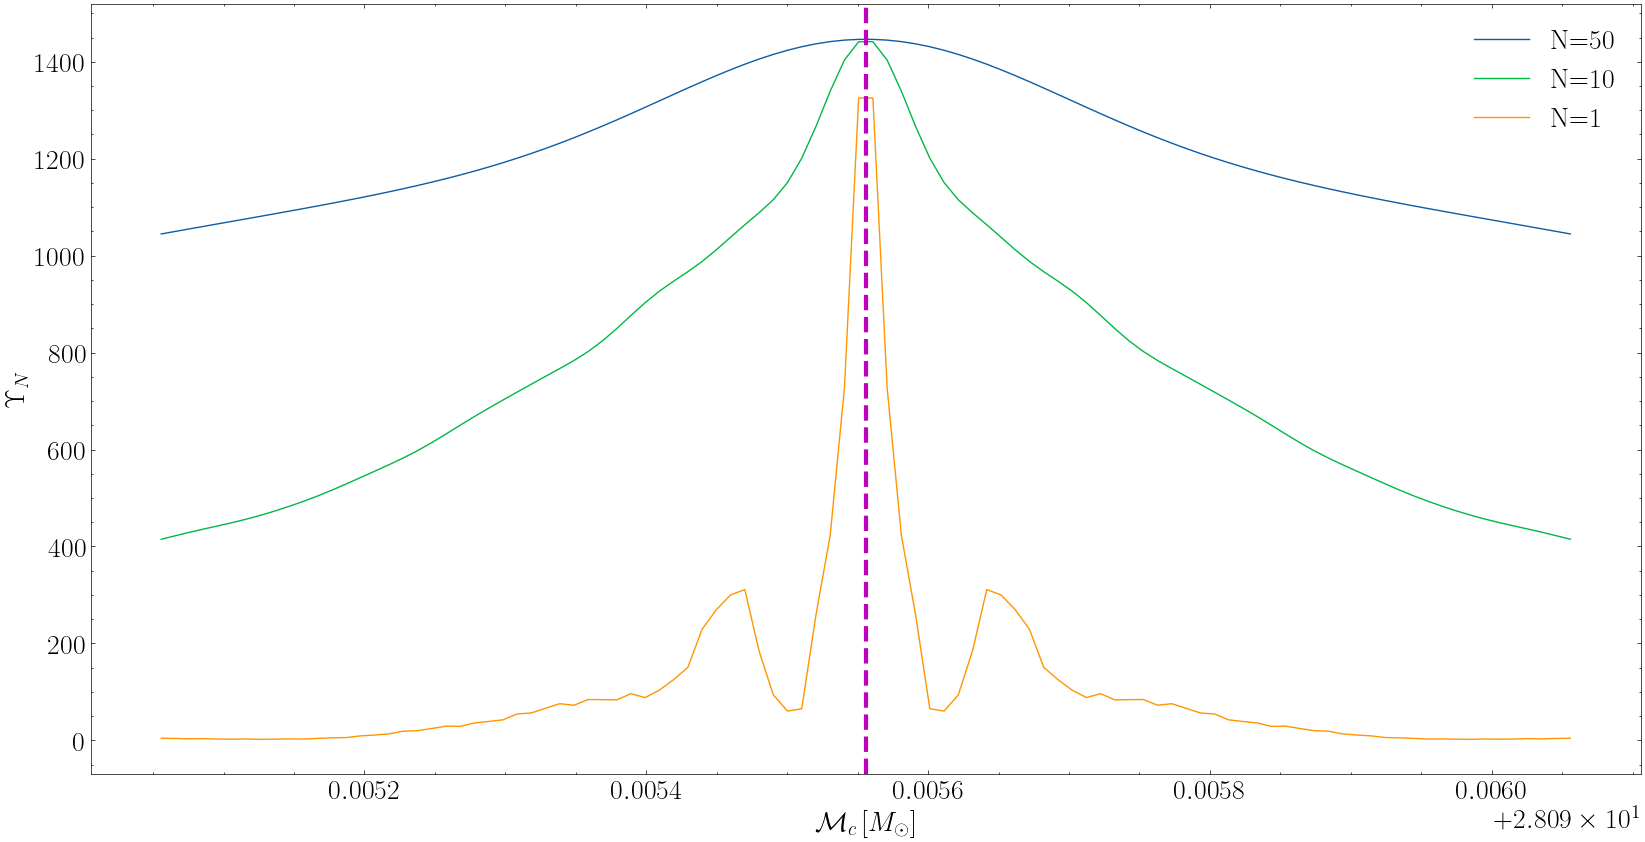

In [33]:
plt.figure(figsize=(20,10))
for index,N in enumerate(Ns):
    plt.plot(Mc_range,master_list[index],label='N='+str(N))

plt.ylabel(r'$\Upsilon_{N}$')
plt.xlabel(r'$\mathcal{M}_c \, [M_{\odot}]$')
plt.axvline(source_parameters[0],color='m',linestyle='--',lw=3)
plt.legend()
plt.show()
    

In [34]:
# f_low
master_list = []
f_low_range = np.linspace(0.018/2-1.e-7,0.018/2+1.e-7,100)
for N in Ns: 
    Upsilons = []
    for f_low in f_low_range:
        source_params_offset = source_parameters.copy()
        source_params_offset[-2] = f_low
        source_params_offset_transformed = SC_search.Utility.TaylorF2Ecc_mc_eta_to_m1m2(source_params_offset.copy())

        model= SC_search.Waveforms.TaylorF2Ecc.BBHx_response_interpolate_CPU(source_params_offset_transformed,
                                                                                  freqs_sparse,
                                                                                  freqs,
                                                                                  f_high,
                                                                                  T_obs,
                                                                                  'AET',
                                                                                  logging=False)
        
        Upsilons.append(SC_search.Semi_Coherent_Functions.upsilon_func(model,injection,psd_array,d,num_segments=N))
    master_list.append(Upsilons)

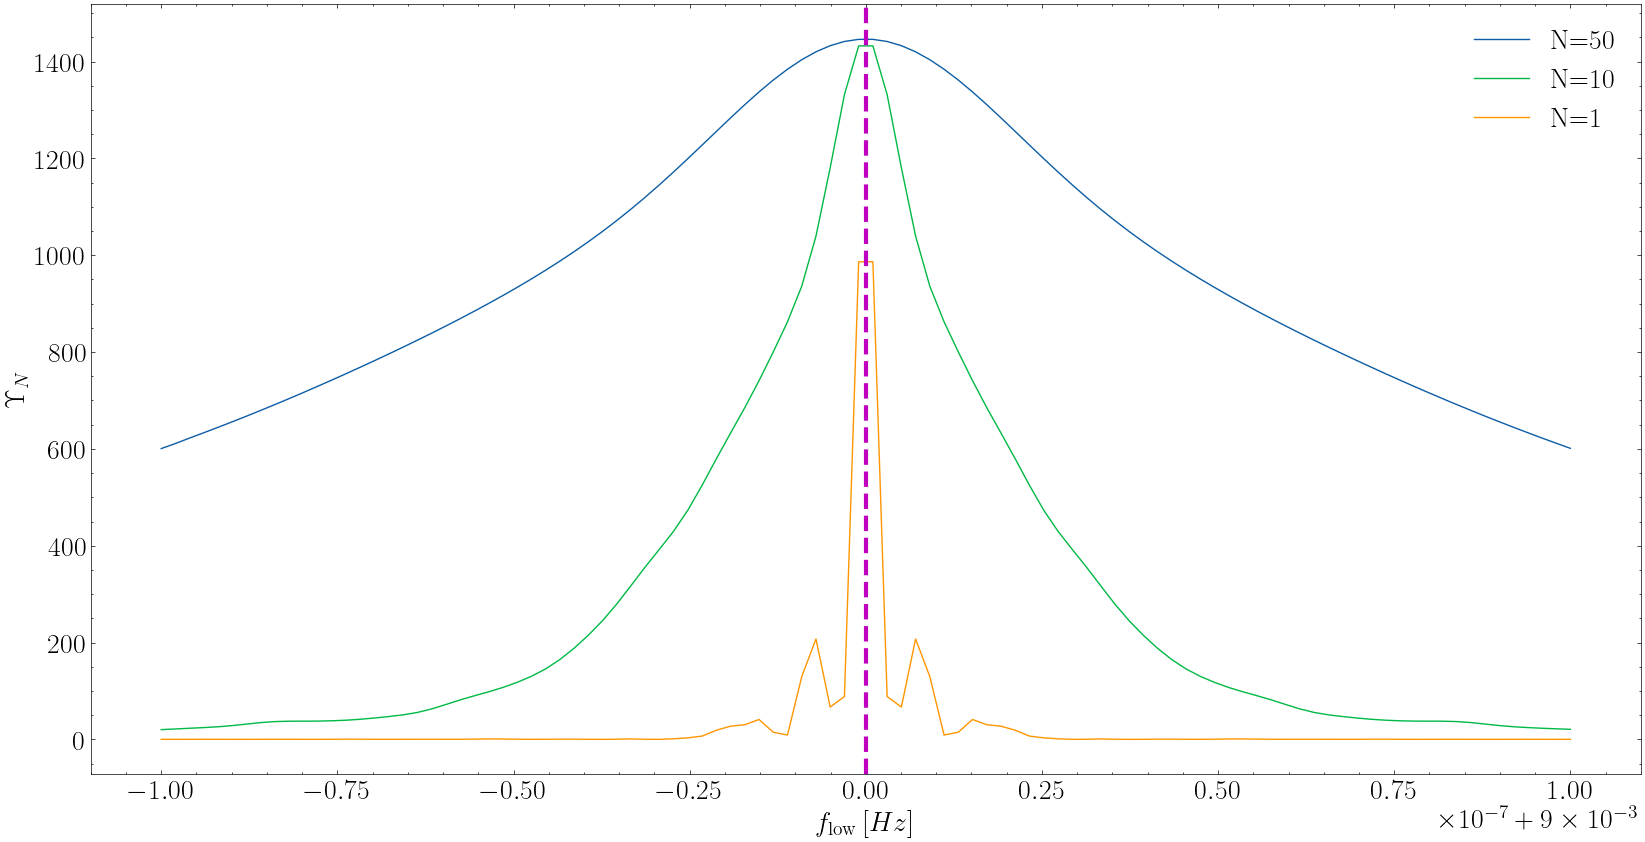

In [36]:
plt.figure(figsize=(20,10))
for index,N in enumerate(Ns):
    plt.plot(f_low_range,master_list[index],label='N='+str(N))

plt.ylabel(r'$\Upsilon_{N}$')
plt.xlabel(r'$f_{\rm low} \, [Hz]$')
plt.axvline(source_parameters[-2],color='m',linestyle='--',lw=3)
plt.legend()
plt.show()
    

In [37]:
# f_low
master_list = []
e0_range = np.linspace(0.01-0.001,0.01+0.001,100)
for N in Ns: 
    Upsilons = []
    for e0 in e0_range:
        source_params_offset = source_parameters.copy()
        source_params_offset[-1] = e0
        source_params_offset_transformed = SC_search.Utility.TaylorF2Ecc_mc_eta_to_m1m2(source_params_offset.copy())

        model= SC_search.Waveforms.TaylorF2Ecc.BBHx_response_interpolate_CPU(source_params_offset_transformed,
                                                                                  freqs_sparse,
                                                                                  freqs,
                                                                                  f_high,
                                                                                  T_obs,
                                                                                  'AET',
                                                                                  logging=False)
        
        Upsilons.append(SC_search.Semi_Coherent_Functions.upsilon_func(model,injection,psd_array,d,num_segments=N))
    master_list.append(Upsilons)

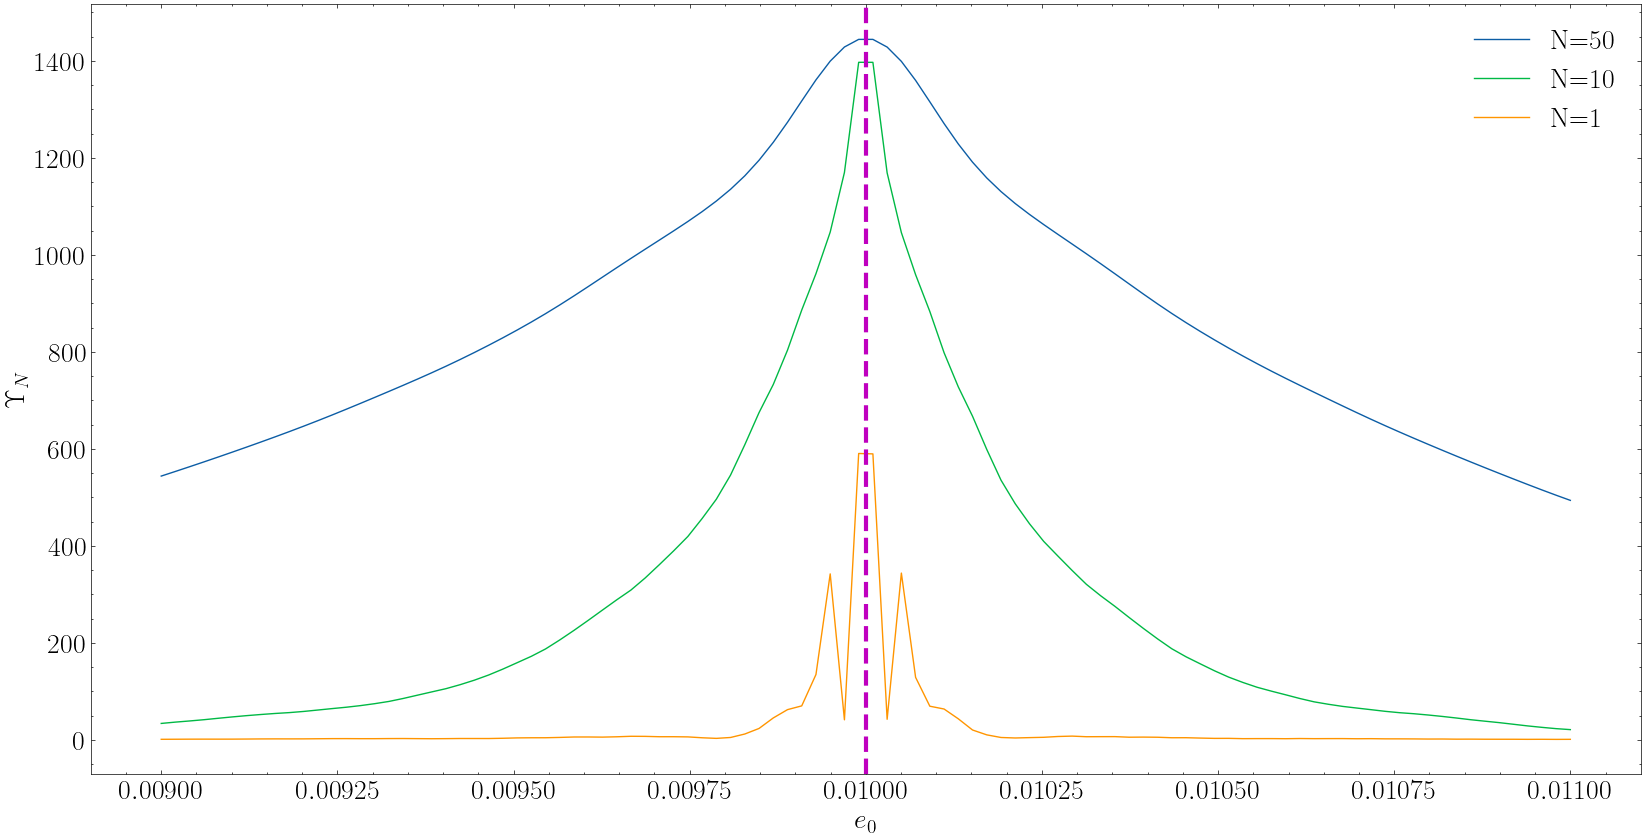

In [38]:
plt.figure(figsize=(20,10))
for index,N in enumerate(Ns):
    plt.plot(e0_range,master_list[index],label='N='+str(N))

plt.ylabel(r'$\Upsilon_{N}$')
plt.xlabel(r'$e_0$')
plt.axvline(source_parameters[-1],color='m',linestyle='--',lw=3)
plt.legend()
plt.show()
    